# NY Motor Vehicle Collisions – Exploratory Data Analysis  
In this notebook, we analyze New York’s Vehicular crash data available at https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95


The data contains information from all police reported motor vehicle collisions in NYC. The information for this dataset is collated from the police report, called MV104-AN, which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

Data is available from 2012-07-01 onwards, however for this analysis, we will limit ourselves to the period up to 2023-08-15, which is when the data was downloaded.

We find that this data contains over 2 million observations, which allows us to explore several aspects of vehicle crashes in NY's boroughs.

The data dictionary for the data is also available at the URL above.

First, we perform unstructured exploration of the data, and then try to answer the following questions:

- We look for which borough has had the maximum number of crashes reported since 2012.

- We relate the number of crashes to to the borough's population to find out which borough has the maximum number of crashes for every 100,000 people. Even though the data does not have this information, we can combine the crash data with the population estimates for the boroughs also available from the City of New York's website (https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9)

| Borough | Population |
| --- | --- |
| Bronx | 1446788 |
| Brooklyn | 2648452 |
| Manhattan | 1638281 |
| Queens | 2330295 |
| Staten Island | 487155 |  

  
- We look for the leading cause of crashes

- We also look for the top-3 causes of crashes, and try to calculate what proportion of all crashes are caused by these top-3 causes.

- We then look to some of the more serious implications of crashes by examining how many accidents involved at least one fatality.

- We then compute, on average, out of every 1000 accidents, how many have resulted in at least one person dead.

- We also look for missing data and try to compute the proportion of accidents in the data that do not have a Borough code.

- The fields 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' represent the first two vehicles involved in the accident.  We look for which combinations of vehicles have the most number of accidents.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip

In [2]:

df = pd.read_pickle("~/Downloads/Motor_Vehicle_Collisions_-_Crashes.pkl")
df

,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


***
## Exploratory Data Analysis
***

#### Adding sperate columns of "Dates", "Days of the Week" and "Times" to get better understanding of the accident occurences.

In [3]:
# Convert 'DateTimeColumn' to datetime format if it's not already
df['CRASH DATE_CRASH TIME'] = pd.to_datetime(df['CRASH DATE_CRASH TIME'], errors='coerce')

# Split the 'DateTimeColumn' into separate 'Date', 'Day', and 'Time' columns
df['Date'] = df['CRASH DATE_CRASH TIME'].dt.date
df['Day'] = df['CRASH DATE_CRASH TIME'].dt.strftime('%A')
df['Time'] = df['CRASH DATE_CRASH TIME'].dt.strftime('%H:%M:%S')

df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date,Day,Time
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,2021-09-11,Saturday,02:39:00
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2022-03-26,Saturday,11:45:00
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29,Wednesday,06:55:00
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,2021-09-11,Saturday,09:35:00
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,4486609,NaN,NaN,NaN,NaN,NaN,2021-12-14,Tuesday,08:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN,2023-07-03,Monday,18:05:00
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,NaN,4648117,Sedan,NaN,NaN,NaN,NaN,2023-07-22,Saturday,21:39:00
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,NaN,4648366,Taxi,NaN,NaN,NaN,NaN,2023-07-02,Sunday,17:55:00
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN,2023-07-22,Saturday,13:15:00


### Plotting graph to analyze which day of the week had most crashes.

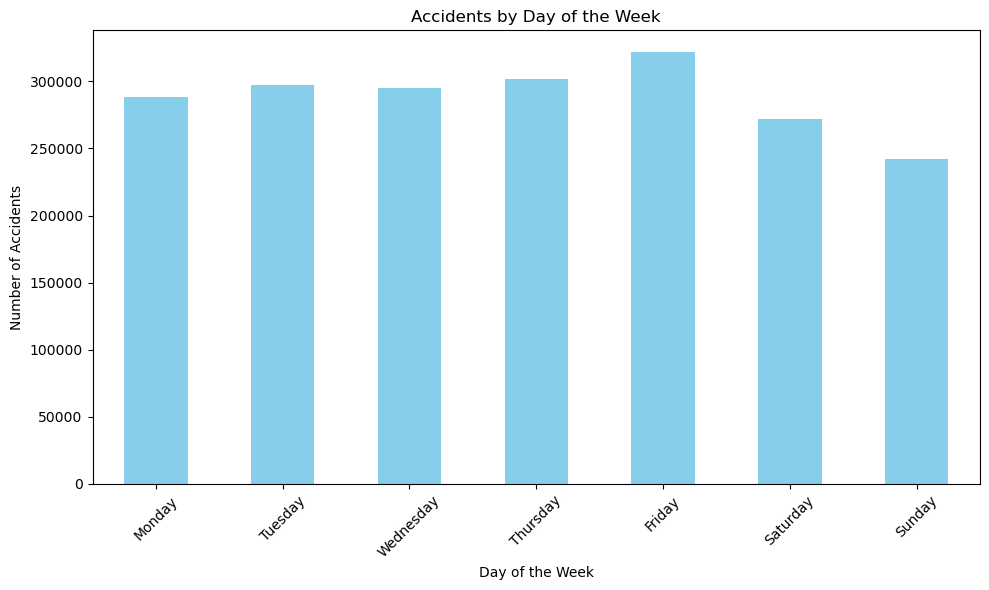

In [4]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by 'Day' and count the number of occurrences
accidents_by_day = df['Day'].value_counts().sort_index()

# Reorder the index based on the specified day_order
accidents_by_day = accidents_by_day.reindex(day_order, fill_value=0)

# Create a bar plot
plt.figure(figsize=(10, 6))
accidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()



### Which hour of the week had most crashed?

In [5]:
# Convert the 'Time' column to a datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Extract the hour from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: x.hour)

# Group the data by 'Hour' and count the number of accidents for each hour
accidents_by_hour = df['Hour'].value_counts().sort_index()

# Find the hour with the highest number of accidents
hour_with_most_accidents = accidents_by_hour.idxmax()

# Print the hour with the most accidents and its count
print(f"The hour with the most accidents is {hour_with_most_accidents} o'clock with {accidents_by_hour[hour_with_most_accidents]} accidents.")

The hour with the most accidents is 16 o'clock with 145924 accidents.


### Adding new column for Time Slot of Days - Day, Afternoon, evening and Night

In [6]:
# Create a function to categorize time into slots
def categorize_time(time):
    if 5 <= time.hour < 12:
        return "Morning"
    elif 12 <= time.hour < 17:
        return "Afternoon"
    elif 17 <= time.hour < 21:
        return "Evening"
    else:
        return "Night"

# Create new columns for time slot and day of the week
df['TimeSlot'] = df['Time'].apply(categorize_time)

df


,CRASH DATE_CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Date,Day,Time,Hour,TimeSlot
0,2021-09-11 02:39:00,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,...,Sedan,Sedan,NaN,NaN,NaN,2021-09-11,Saturday,02:39:00,2,Night
1,2022-03-26 11:45:00,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,...,Sedan,NaN,NaN,NaN,NaN,2022-03-26,Saturday,11:45:00,11,Morning
2,2022-06-29 06:55:00,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,...,Sedan,Pick-up Truck,NaN,NaN,NaN,2022-06-29,Wednesday,06:55:00,6,Morning
3,2021-09-11 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,...,Sedan,NaN,NaN,NaN,NaN,2021-09-11,Saturday,09:35:00,9,Morning
4,2021-12-14 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,2021-12-14,Tuesday,08:13:00,8,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018240,2023-07-03 18:05:00,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,0.0,...,Sedan,Sedan,NaN,NaN,NaN,2023-07-03,Monday,18:05:00,18,Evening
2018241,2023-07-22 21:39:00,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,1.0,...,Sedan,NaN,NaN,NaN,NaN,2023-07-22,Saturday,21:39:00,21,Night
2018242,2023-07-02 17:55:00,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,0.0,...,Taxi,NaN,NaN,NaN,NaN,2023-07-02,Sunday,17:55:00,17,Evening
2018243,2023-07-22 13:15:00,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,1.0,...,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN,2023-07-22,Saturday,13:15:00,13,Afternoon


### Which day and time slot of the day had most crashes?

In [7]:
# Group the data by day of the week and time slot, and count accidents in each group
accident_counts = df.groupby(['Day', 'TimeSlot']).size().reset_index(name='AccidentCount')

# Find the time slot and day of the week with the most accidents
most_accidents = accident_counts.loc[accident_counts['AccidentCount'].idxmax()]

print("Day with the most accidents:", most_accidents['Day'])
print("Time slot with the most accidents:", most_accidents['TimeSlot'])
print("Number of accidents:", most_accidents['AccidentCount'])

Day with the most accidents: Friday
Time slot with the most accidents: Afternoon
Number of accidents: 101917


### Plotting graph to analyze in which time slot of the day most crashes occurred.

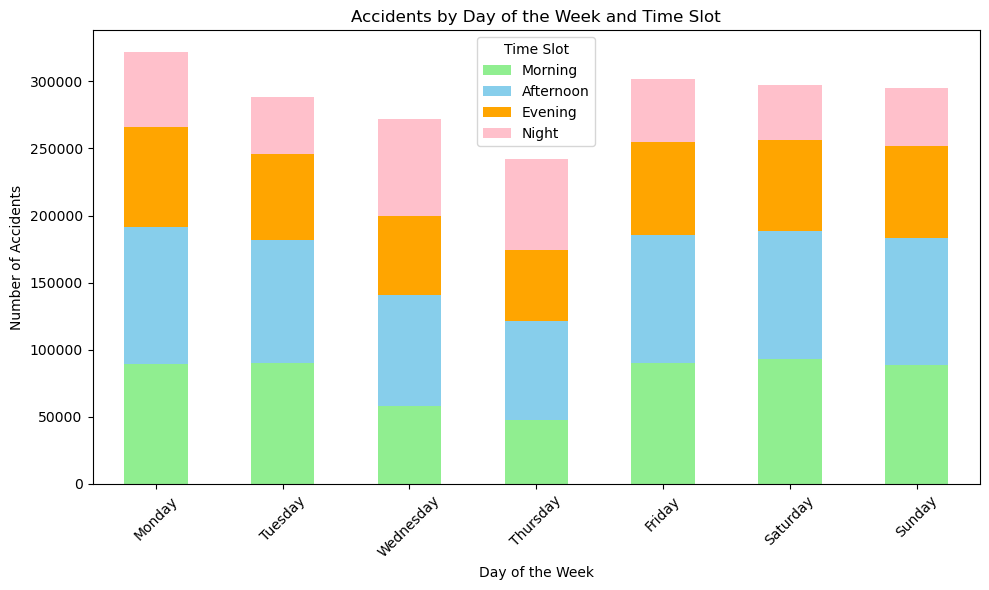

In [8]:
# Group by 'DayOfWeek' and 'TimeSlot' and count the accidents
grouped = df.groupby(['Day', 'TimeSlot']).size().unstack(fill_value=0)

# Reorder columns to have them in a logical order
column_order = ['Morning', 'Afternoon', 'Evening', 'Night']
grouped = grouped[column_order]

# Define custom colors for each time slot
colors = ['lightgreen', 'skyblue', 'orange', 'pink']

# Create a bar chart with custom colors
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week and Time Slot')

# Customize the x-axis labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days_of_week)), days_of_week, rotation=45)

# Show the legend
plt.legend(title='Time Slot')

# Display the plot
plt.tight_layout()
plt.show()



### Which zip code of the boroughs had the most accidents?

In [9]:
# Group the data by 'Borough Key' and 'Zip Code Key', and count accidents in each group
borough_zip_counts = df.groupby(['BOROUGH', 'ZIP CODE']).size().reset_index(name='AccidentCount')

# Find the zip code with the most accidents in each borough
most_accidents_by_borough = borough_zip_counts.groupby('BOROUGH').apply(lambda x: x.loc[x['AccidentCount'].idxmax()])

# Print the result for each borough
for _, row in most_accidents_by_borough.iterrows():
    borough = row['BOROUGH']
    zip_code = row['ZIP CODE']
    accident_count = row['AccidentCount']
    print(f"Borough: {borough}, Zip Code with Most Accidents: {zip_code}, Number of Accidents: {accident_count}")


Borough: BRONX, Zip Code with Most Accidents: 10467.0, Number of Accidents: 10022
Borough: BROOKLYN, Zip Code with Most Accidents: 11207.0, Number of Accidents: 19792
Borough: MANHATTAN, Zip Code with Most Accidents: 10019.0, Number of Accidents: 11288
Borough: QUEENS, Zip Code with Most Accidents: 11385.0, Number of Accidents: 12905
Borough: STATEN ISLAND, Zip Code with Most Accidents: 10306.0, Number of Accidents: 6490


### Plotting graph to analyze what percentage of people were injured and killed due to crashes as per their boroughs.

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_33076/19806380.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('BOROUGH').sum()


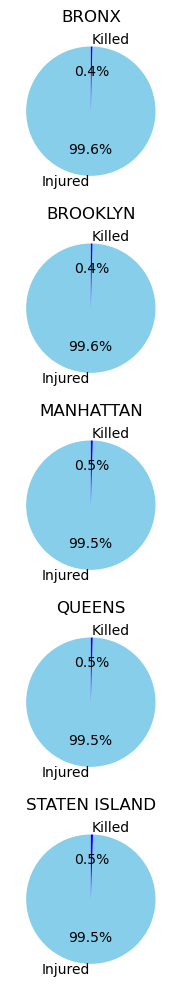

In [10]:
import matplotlib.pyplot as plt

# Group the data by 'BOROUGH'
grouped = df.groupby('BOROUGH').sum()

# Get the distinct borough names
boroughs = grouped.index

# Define the width of each pie chart
fig, axs = plt.subplots(nrows=len(boroughs), ncols=1, figsize=(4, 2 * len(boroughs)))

# Iterate through each borough and create a pie chart
for i, borough in enumerate(boroughs):
    # Get the data for the current borough
    borough_data = grouped.loc[borough]
    
    # Create a pie chart for the current borough
    ax = axs[i]
    ax.pie(borough_data[['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']],
           labels=['Injured', 'Killed'],
           colors=['skyblue', 'blue'],
           autopct='%1.1f%%',
           startangle=90)
    
    # Set the title for the current borough
    ax.set_title(f'{borough}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Plotting graph to analyze how many pedestrians, cyclists and motorists were injured and killed with respect to their boroughs.

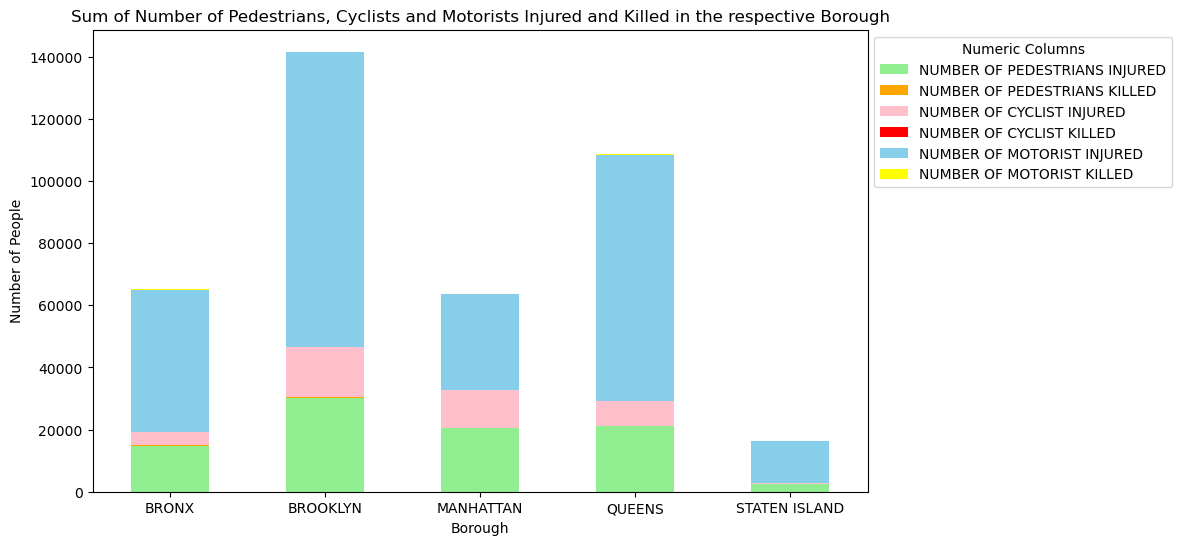

In [11]:
# Define the columns you want to sum
columns_to_sum = [
    'NUMBER OF PEDESTRIANS INJURED', 
    'NUMBER OF PEDESTRIANS KILLED', 
    'NUMBER OF CYCLIST INJURED', 
    'NUMBER OF CYCLIST KILLED', 
    'NUMBER OF MOTORIST INJURED', 
    'NUMBER OF MOTORIST KILLED']

# Define custom colors for each column using a dictionary
column_colors = {
    'NUMBER OF PEDESTRIANS INJURED': 'lightgreen',
    'NUMBER OF PEDESTRIANS KILLED': 'orange',
    'NUMBER OF CYCLIST INJURED': 'pink',
    'NUMBER OF CYCLIST KILLED': 'red',
    'NUMBER OF MOTORIST INJURED': 'skyblue',
    'NUMBER OF MOTORIST KILLED': 'yellow'
}

# Group the data by 'BOROUGH' and calculate the sum for selected columns
grouped = df.groupby('BOROUGH')[columns_to_sum].sum()

# Plot the bar graph with custom colors
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=[column_colors[column] for column in columns_to_sum])
plt.title('Sum of Number of Pedestrians, Cyclists and Motorists Injured and Killed in the respective Borough')
plt.xlabel('Borough')
plt.ylabel('Number of People')
plt.legend(title='Numeric Columns', loc='upper left', bbox_to_anchor=(1.0, 1.0))  # Adjust legend position
plt.xticks(rotation=0)
plt.show()

### Which borough had the maximum number of crashes reported since 2012?

In [12]:
# Convert the 'CRASH DATE' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data to include only records since 2012
df_2012 = df[df['Date'] >= '2012-01-01']

# Group the data by borough and count the number of crashes in each borough
borough_crash_count = df_2012['BOROUGH'].value_counts()

# Find the borough with the highest total number of crashes
max_crashes_borough = borough_crash_count.idxmax()

print(f"The borough with the highest total number of crashes reported since 2012 is {max_crashes_borough}.")

The borough with the highest total number of crashes reported since 2012 is BROOKLYN.


### Analyzing the pattern of crashes with respect to the boroughs.

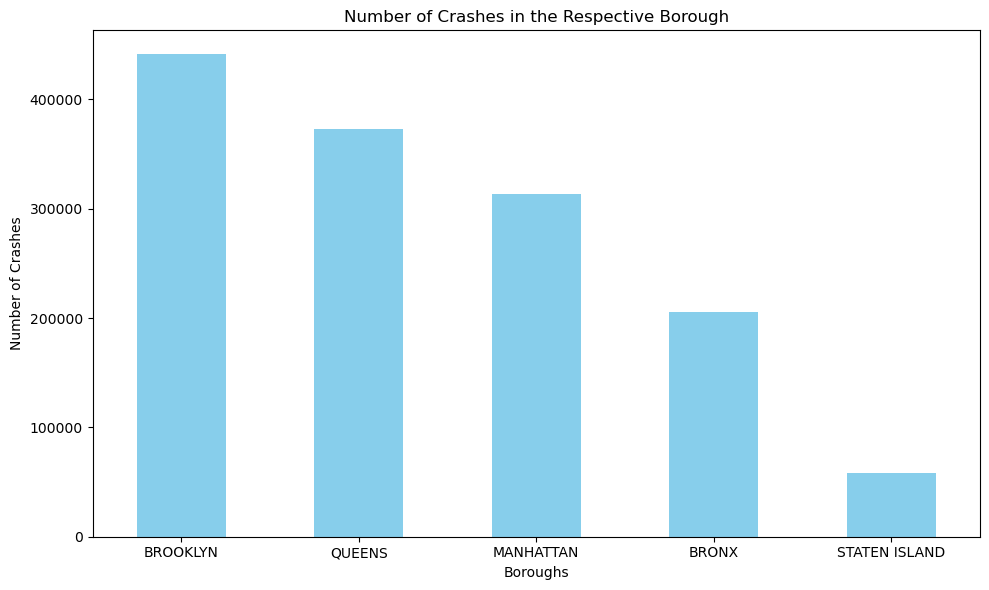

In [13]:
# Count the occurrences of each factor
factor_count = df_2012['BOROUGH'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
factor_count.plot(kind='bar', color='skyblue')
plt.title('Number of Crashes in the Respective Borough')
plt.xlabel('Boroughs')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

### Which borough had the maximum number of crashes adjusted for population?

In [14]:
# Population data
population_data = {
    'Bronx': 1446788,
    'Brooklyn': 2648452,
    'Manhattan': 1638281,
    'Queens': 2330295,
    'Staten Island': 487155
}

# Filter the data frame to include only rows from July 2012 onwards
df['Date'] = pd.to_datetime(df['Date'])  # Convert DATE column to datetime
start_date = pd.to_datetime('2012-07-01')
filtered_df = df[df['Date'] >= start_date]

# Calculate the total number of crashes for each borough in the filtered data
crash_by_borough = filtered_df['BOROUGH'].value_counts().to_dict()

# Calculate crashes per 100,000 people for each borough
crashes_per_100k = {}
for borough, crashes in crash_by_borough.items():
    population = population_data.get(borough.capitalize())  # Get population for the borough
    if population is not None:
        crashes_per_100k[borough] = (crashes / population) * 100000

# Find the borough with the most crashes per 100,000 people
most_crashes_borough = max(crashes_per_100k, key=crashes_per_100k.get)

print(f"The borough with the most crashes per 100,000 people is {most_crashes_borough} with {crashes_per_100k[most_crashes_borough]:.2f} crashes per 100,000 people.")


The borough with the most crashes per 100,000 people is MANHATTAN with 19121.63 crashes per 100,000 people.


### What is the leading cause of crashes?

In [15]:
# Filter out rows where 'CONTRIBUTING FACTOR VEHICLE 1' is 'Unspecified'
new_df = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'Unspecified']

# Calculate the total number of accidents for each contributing factor
contributing_factor_counts = new_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Find the leading cause of crashes (excluding 'Unspecified')
cause = contributing_factor_counts.idxmax()

# Calculate the proportion of accidents attributable to the leading cause
total_accidents = len(new_df)
proportion = contributing_factor_counts[cause] / total_accidents

print(f"The leading cause of crashes (excluding 'Unspecified') is '{cause}'")
print(f"The proportion of accidents attributable to this cause is {proportion:.2%}")

The leading cause of crashes (excluding 'Unspecified') is 'Driver Inattention/Distraction'
The proportion of accidents attributable to this cause is 30.27%


### Analyzing the reasons of crashes.

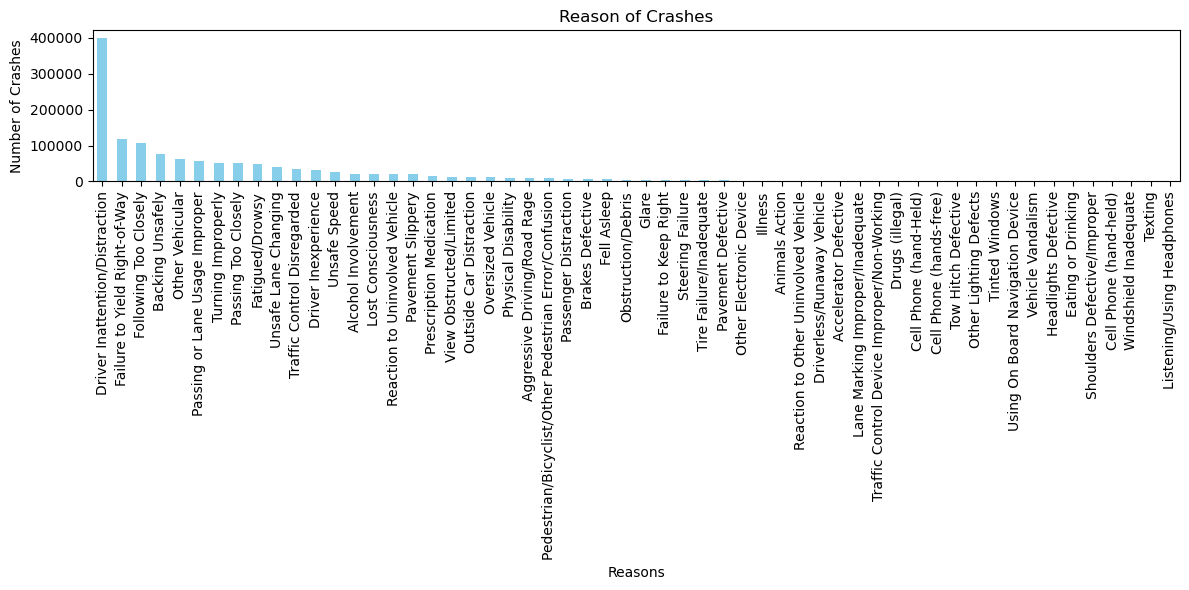

In [16]:
# Cleaning the dataframe
cleaned_df = df[~df['CONTRIBUTING FACTOR VEHICLE 1'].isin(['Unspecified', '80', '1', 'Illnes', 'Drugs (Illegal)'])]

# Count the occurrences of each factor
factors = cleaned_df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
factors.plot(kind='bar', color='skyblue')
plt.title('Reason of Crashes')
plt.xlabel('Reasons')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


### What are the top 3 causes of crashes?

In [17]:
# Exclude the 'Unspecified' factor from the counts
top_factors = contributing_factor_counts.index[0:3]  # Get the top 3 factors (excluding 'Unspecified')

# Calculate the proportion of total accidents accounted for by the top 3 causes
total_accidents = len(new_df)
proportion = contributing_factor_counts[top_factors].sum() / total_accidents

print(f"The top 3 causes of crashes (excluding 'Unspecified') account for {proportion:.2%} of total crashes.")

The top 3 causes of crashes (excluding 'Unspecified') account for 47.37% of total crashes.


### What is the count of fatality?

In [18]:
# Filter the dataset to include only accidents with at least one fatality
fatal_crash = df_2012[df_2012['NUMBER OF PERSONS KILLED'] >= 1]

# Calculate the total count of accidents with at least one fatality
total_fatal_crash = len(fatal_crash)

print(f"The total count of accidents that involved at least one fatality since 2012 is {total_fatal_crash}.")

The total count of accidents that involved at least one fatality since 2012 is 2804.


### Analyzing the count of fatality over the years.

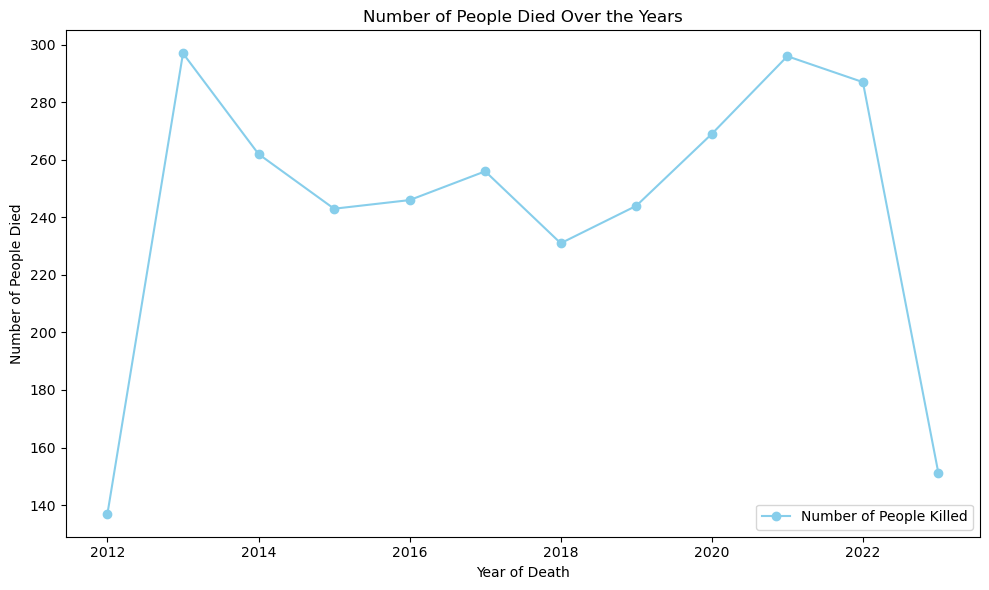

In [19]:
# Convert the 'Date' column to a datetime object if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column and create a new column 'Year'
df['Year'] = df['Date'].dt.year

# Group the data by 'Year' and sum the number of people killed in each year
deaths_by_year = df.groupby('Year')['NUMBER OF PERSONS KILLED'].sum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(deaths_by_year.index, deaths_by_year.values, marker='o', linestyle='-',
         color='skyblue', markersize=6, label='Number of People Killed')
plt.title('Number of People Died Over the Years')
plt.xlabel('Year of Death')
plt.ylabel('Number of People Died')
plt.grid(False)  # Add a grid for better readability
plt.legend()  # Show a legend

# Show the plot
plt.tight_layout()
plt.show()

### On average, out of every 1000 accidents, how many have resulted in at least one person dead?

In [20]:
# Calculate the total number of accidents
total_crashes = len(df)

# Calculate the total number of accidents with at least one fatality
fatal_crashes = df[df['NUMBER OF PERSONS KILLED'] > 0]
total_fatal_crashes = len(fatal_crashes)

# Calculate the average number of fatal accidents for every 1000 accidents
average_fatal_crashes_per_1000 = (total_fatal_crashes / total_crashes) * 1000

print(f"On average, for every 1000 accidents, {average_fatal_crashes_per_1000:.3f} have resulted in at least one person dead.")

On average, for every 1000 accidents, 1.389 have resulted in at least one person dead.


### What proportion of accidents in the data do not have a Borough code?

In [21]:
# Calculate the number of accidents without a Borough code
crash_without_code = df['BOROUGH'].isna().sum()

# Calculate the proportion of accidents without a Borough code
proportion_without_borough = crash_without_code / total_crashes

print(f"The proportion of accidents in the data without a Borough code is {proportion_without_borough:.1%}.")

The proportion of accidents in the data without a Borough code is 31.1%.


### Which combinations of vehicles have the most number of accidents?

In [22]:
# Combine 'VEHICLE TYPE CODE 1' and 'VEHICLE TYPE CODE 2' into a single column for analysis
df['Vehicle Combination'] = df['VEHICLE TYPE CODE 1'] + ' + ' + df['VEHICLE TYPE CODE 2']

# Calculate the most common combination of vehicles involved in accidents
most_common_combo = df['Vehicle Combination'].mode().iloc[0]

# Calculate the number of accidents involving the most common combination
num_most_common_combo_crashes = len(df[df['Vehicle Combination'] == most_common_combo])

print(f"The combination of vehicles with the most number of accidents is: {most_common_combo}")
print(f"The number of accidents involving this combination is: {num_most_common_combo_crashes}")

The combination of vehicles with the most number of accidents is: Sedan + Sedan
The number of accidents involving this combination is: 197944


### Analyzing the combinations of vehicles which cause the crashes.

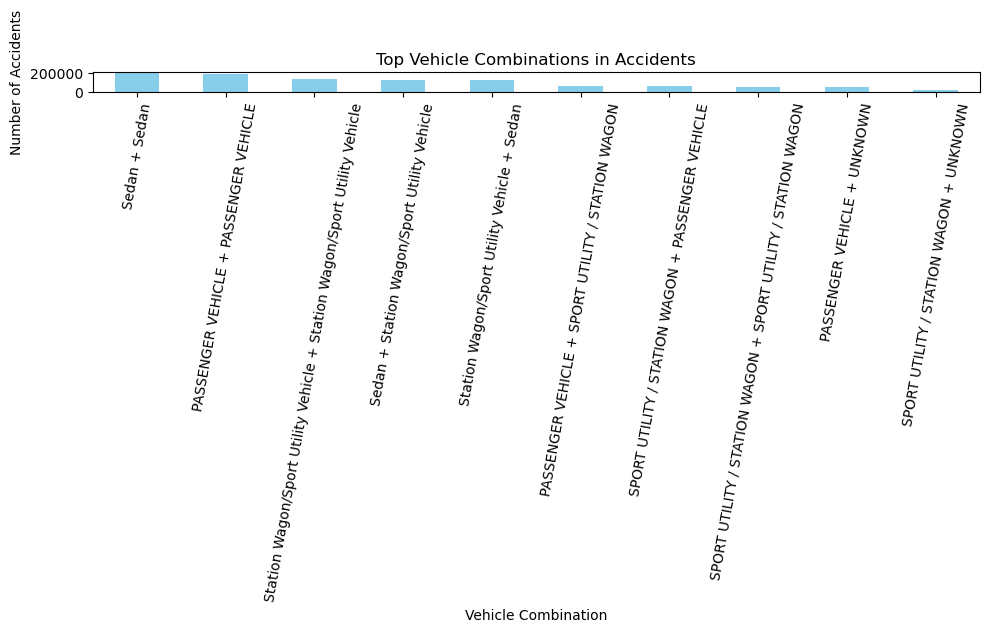

In [23]:
# Combine the 'Vehicle 1' and 'Vehicle 2' columns into a single column 'Vehicle Combination'
df['Vehicle Combination'] = df['VEHICLE TYPE CODE 1'] + ' + ' + df['VEHICLE TYPE CODE 2']

# Count the occurrences of each vehicle combination
vehicle_combination_counts = df['Vehicle Combination'].value_counts().head(10)  # Adjust 'head(10)' to show the top N combinations

# Create a bar plot
plt.figure(figsize=(10, 6))
vehicle_combination_counts.plot(kind='bar', color='skyblue')
plt.title('Top Vehicle Combinations in Accidents')
plt.xlabel('Vehicle Combination')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=80)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


***  
## Finished